**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

# import data 2C_weka.csv for 2 Class Classifcation.


In [62]:
df_2c = pd.read_csv('2Classdata.csv')

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [63]:
df_2c.shape

(310, 7)

In [64]:
df_2c.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [65]:
df_2c.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [66]:
df_2c.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [67]:
df_2c.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

From the above, we can conclude that there are no missing values in the dataset. Hence no action required to treat missing values.

In [68]:
df_2c['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [69]:
df_2c.groupby(df_2c['class']).count()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Abnormal,210,210,210,210,210,210
Normal,100,100,100,100,100,100


The given dataset is balanced dataset.

In [70]:
corr_matrix = df_2c.corr()
corr_matrix

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


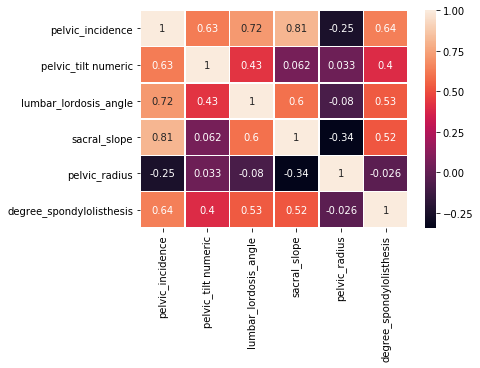

In [71]:
sns.heatmap(corr_matrix,annot=True, linewidths=0.5)
plt.show()

In [72]:
corr_matrix[corr_matrix > -0.1]

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,NaN,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,NaN,0.523557
pelvic_radius,NaN,0.032668,-0.080344,NaN,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


In [73]:
corr_matrix[corr_matrix < 0.1]

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,NaN,NaN,NaN,NaN,-0.247467,NaN
pelvic_tilt numeric,NaN,NaN,NaN,0.062345,0.032668,NaN
lumbar_lordosis_angle,NaN,NaN,NaN,NaN,-0.080344,NaN
sacral_slope,NaN,0.062345,NaN,NaN,-0.342128,NaN
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,NaN,-0.026065
degree_spondylolisthesis,NaN,NaN,NaN,NaN,-0.026065,NaN


All the features are required in model because the none of the features are uncorrelated.

In [74]:
df_2c.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


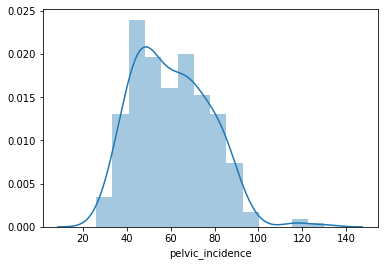

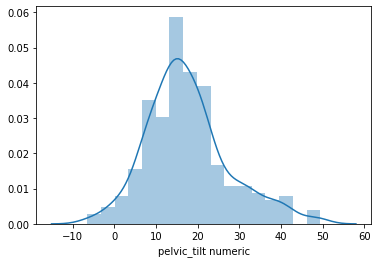

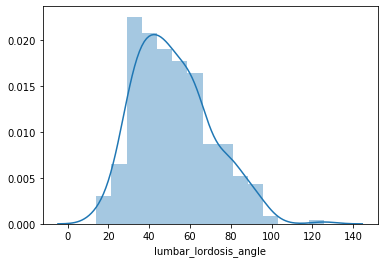

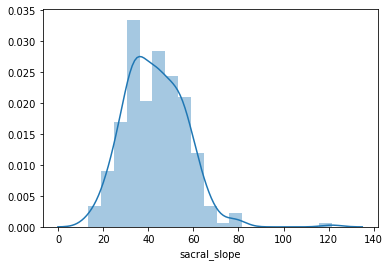

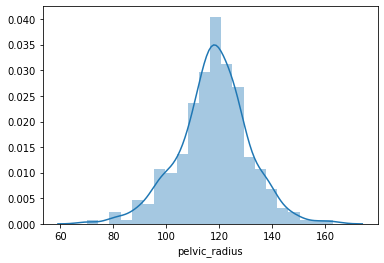

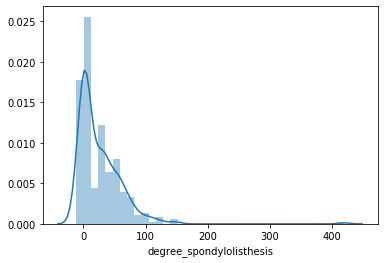

In [75]:
for col in df_2c.columns:
    if(col != 'class'):
        sns.distplot(df_2c[col],hist=True)
        plt.show()

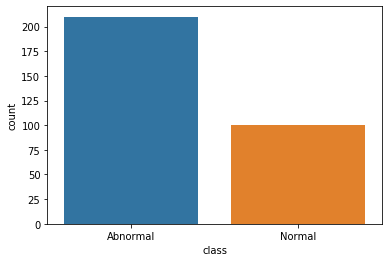

In [76]:
sns.countplot(x=df_2c['class'],data=df_2c)
plt.show()

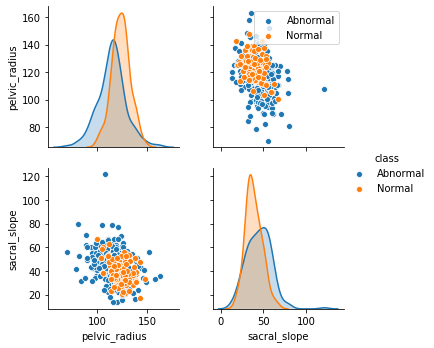

In [77]:
sns.pairplot(df_2c,hue='class',vars=['pelvic_radius','sacral_slope'])
plt.legend()
plt.show()


# Encode the Class variable to integer.

In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
categorical_feature_mask = df_2c.dtypes == object
categorical_feature_mask

pelvic_incidence            False
pelvic_tilt numeric         False
lumbar_lordosis_angle       False
sacral_slope                False
pelvic_radius               False
degree_spondylolisthesis    False
class                        True
dtype: bool

In [80]:
categorical_cols = df_2c.columns[categorical_feature_mask].tolist()
categorical_cols

['class']

In [81]:
le = LabelEncoder()
df_2c[categorical_cols] = df_2c[categorical_cols].apply(lambda col:le.fit_transform(col))

In [82]:
df_2c.sample(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
84,76.326002,42.396204,57.200000,33.929797,124.267007,50.127457,0
151,48.030624,3.969815,58.344519,44.060809,125.350962,35.000078,0
124,74.717228,14.321679,32.500000,60.395549,107.182218,37.017080,0
188,85.680950,38.650035,82.680977,47.030914,120.840707,61.959034,0
103,49.782121,6.466805,53.000000,43.315316,110.864783,25.335647,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
222,56.103774,13.106307,62.637020,42.997467,116.228503,31.172767,1
177,80.817771,19.238981,61.642451,61.578791,89.471834,44.167602,0
116,70.484104,12.489488,62.417142,57.994617,114.190049,56.902448,0
78,67.412538,17.442797,60.144640,49.969741,111.123970,33.157646,0


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [83]:
feature_df = df_2c.drop('class',axis=1)
label_df = df_2c['class']

In [84]:
feature_df.head(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [85]:
X = np.array(feature_df)
X.shape

(310, 6)

In [86]:
Y = np.array(label_df)
Y.shape

(310,)

# Normalize your Data (X) to get values between 0 to 1.

In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
norm_X = scaler.fit(X).transform(X)
norm_X

array([[0.35568788, 0.51989984, 0.22917997, 0.2508573 , 0.30746116,
        0.02514839],
       [0.12450104, 0.2967831 , 0.09857833, 0.14462935, 0.47664891,
        0.03636497],
       [0.41166648, 0.51393229, 0.32299466, 0.30766054, 0.38609692,
        0.0175229 ],
       ...,
       [0.34043781, 0.52244298, 0.28789745, 0.23490726, 0.59779618,
        0.01943732],
       [0.18425678, 0.27235174, 0.24684569, 0.21462279, 0.52117504,
        0.02624045],
       [0.07420202, 0.20770855, 0.20261992, 0.14251659, 0.57924032,
        0.02527676]])

# Split the dat as train and test with a ratio of 70:30.

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(norm_X, Y, test_size=0.30, random_state=93)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [89]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors = 3, weights='distance')

In [90]:
NNH.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [91]:
predicted_labels = NNH.predict(X_test)

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [92]:
NNH.score(X_test,Y_test)

0.8172043010752689

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [93]:
for i in range(1,21,2):
    NNH = KNeighborsClassifier(n_neighbors = i, weights='distance')
    NNH.fit(X_train, Y_train)
    predicted_labels = NNH.predict(X_test)
    score = NNH.score(X_test,Y_test)
    print('The Model Accuracy Score for the {} is {}'. format(i,score))

The Model Accuracy Score for the 1 is 0.7526881720430108
The Model Accuracy Score for the 3 is 0.8172043010752689
The Model Accuracy Score for the 5 is 0.8387096774193549
The Model Accuracy Score for the 7 is 0.8494623655913979
The Model Accuracy Score for the 9 is 0.8494623655913979
The Model Accuracy Score for the 11 is 0.8602150537634409
The Model Accuracy Score for the 13 is 0.8709677419354839
The Model Accuracy Score for the 15 is 0.8709677419354839
The Model Accuracy Score for the 17 is 0.8602150537634409
The Model Accuracy Score for the 19 is 0.8494623655913979


From the above, there are two values for K which gives better accuracy score and they are K=(13,15).

Also the accuracy of model is same in both K=13 and K=15 cases.

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [94]:
df_3c = pd.read_csv('3Classdata.csv')

In [95]:
df_3c.shape

(310, 7)

In [96]:
df_3c.sample(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
194,72.643850,18.929117,68.000000,53.714733,116.963416,25.384247,Spondylolisthesis
217,38.126589,6.557617,50.445075,31.568971,132.114805,6.338199,Normal
299,82.905351,29.894119,58.250542,53.011232,110.708958,6.079338,Normal
245,47.805559,10.688698,54.000000,37.116861,125.391138,-0.402523,Normal
301,89.014875,26.075981,69.021259,62.938894,111.481075,6.061508,Normal
267,52.862214,9.410372,46.988052,43.451842,123.091240,1.856659,Normal
283,48.995958,13.113820,51.873520,35.882137,126.398188,0.535472,Normal
285,67.804694,16.550662,43.256802,51.254033,119.685645,4.867540,Normal
74,72.222334,23.077711,91.000000,49.144624,137.736655,56.804093,Spondylolisthesis
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [97]:
df_3c.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [98]:
df_3c.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [99]:
df_3c['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [100]:
df_3c.groupby(df_3c['class']).count()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Hernia,60,60,60,60,60,60
Normal,100,100,100,100,100,100
Spondylolisthesis,150,150,150,150,150,150


From the above, the given dataset is a balanced dataset.

In [101]:
corr_matrix = df_3c.corr()
corr_matrix

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


In [102]:
covariance = df_3c.cov()
covariance

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,297.097633,108.542318,229.392280,188.555315,-56.804919,413.513704
pelvic_tilt,108.542318,100.166675,80.362172,8.375643,4.354120,149.557681
lumbar_lordosis_angle,229.392280,80.362172,344.253290,149.030108,-19.852220,371.897908
sacral_slope,188.555315,8.375643,149.030108,180.179672,-61.159039,263.956023
pelvic_radius,-56.804919,4.354120,-19.852220,-61.159039,177.352531,-13.037396
degree_spondylolisthesis,413.513704,149.557681,371.897908,263.956023,-13.037396,1410.680476


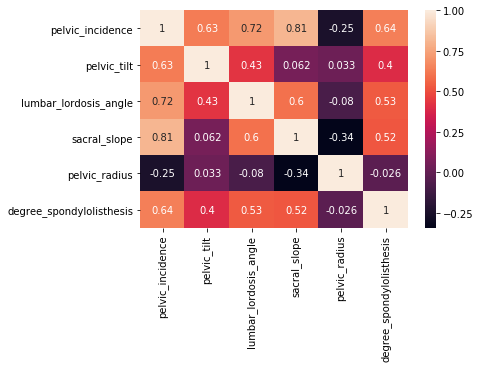

In [103]:
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [104]:
df_3c.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


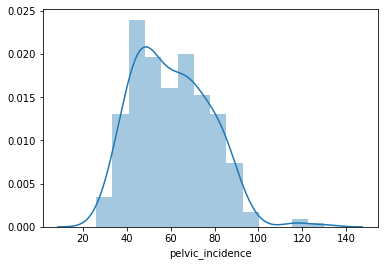

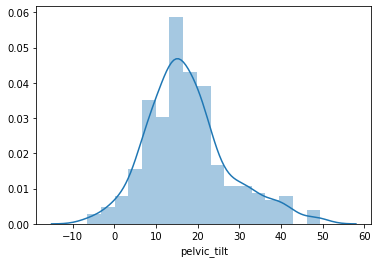

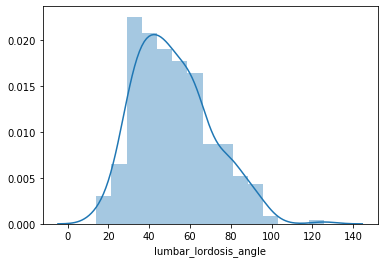

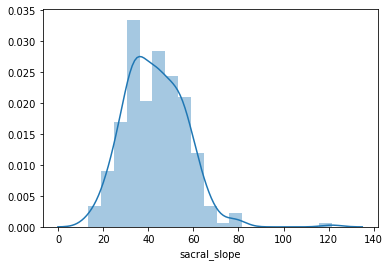

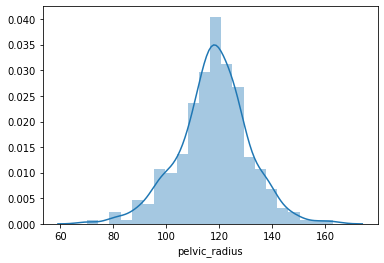

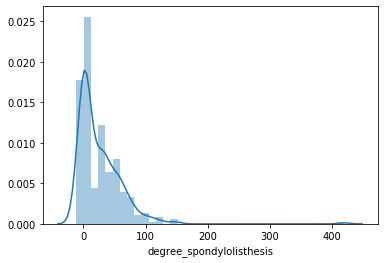

In [105]:
for col in df_3c.columns:
    if(col != 'class'):
        sns.distplot(df_3c[col],hist=True)
        plt.show()

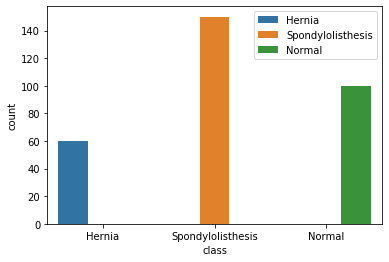

In [106]:
sns.countplot(x='class',hue='class', data=df_3c)
plt.legend()
plt.show()

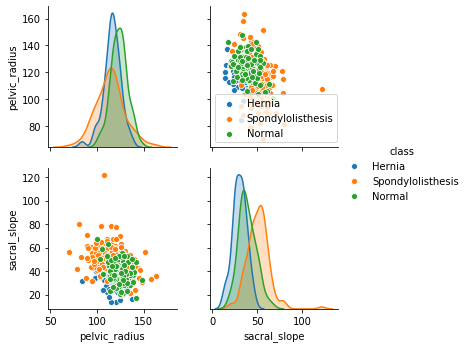

In [107]:
sns.pairplot(data=df_3c,hue='class',vars=['pelvic_radius','sacral_slope'])
plt.legend()
plt.show()

In [108]:
categorical_feature_mask = df_3c.dtypes == object
categorical_feature_mask

pelvic_incidence            False
pelvic_tilt                 False
lumbar_lordosis_angle       False
sacral_slope                False
pelvic_radius               False
degree_spondylolisthesis    False
class                        True
dtype: bool

In [109]:
categorical_cols = df_3c.columns[categorical_feature_mask].tolist()
categorical_cols

['class']

In [110]:
df_3c[categorical_cols] = df_3c[categorical_cols].apply(lambda col:le.fit_transform(col))

df_3c.sample(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
84,76.326002,42.396204,57.200000,33.929797,124.267007,50.127457,2
185,91.468741,24.508177,84.620272,66.960564,117.307897,52.623047,2
10,49.706610,13.040974,31.334500,36.665635,108.648265,-7.825986,0
178,80.654320,26.344379,60.898118,54.309940,120.103493,52.467552,2
94,94.174822,15.380770,67.705721,78.794052,114.890113,53.255220,2
233,40.683229,9.148437,31.021593,31.534792,139.118472,-2.511619,1
273,35.877571,1.112374,43.457257,34.765197,126.923906,-1.632238,1
136,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083,2
78,67.412538,17.442797,60.144640,49.969741,111.123970,33.157646,2
92,85.352315,15.844910,71.668660,69.507405,124.419787,76.020603,2


In [111]:
feature_df = df_3c.drop('class',axis=1)
feature_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [112]:
label_df = df_3c['class']
label_df.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int32

In [113]:
X = np.array(feature_df)
X

array([[ 63.0278175 ,  22.55258597,  39.60911701,  40.47523153,
         98.67291675,  -0.25439999],
       [ 39.05695098,  10.06099147,  25.01537822,  28.99595951,
        114.4054254 ,   4.56425864],
       [ 68.83202098,  22.21848205,  50.09219357,  46.61353893,
        105.9851355 ,  -3.53031731],
       ...,
       [ 61.44659663,  22.6949683 ,  46.17034732,  38.75162833,
        125.6707246 ,  -2.70787952],
       [ 45.25279209,   8.69315736,  41.5831264 ,  36.55963472,
        118.5458418 ,   0.21475017],
       [ 33.84164075,   5.07399141,  36.64123294,  28.76764934,
        123.9452436 ,  -0.19924909]])

In [114]:
Y = np.array(label_df)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [115]:
# Normalization
norm_x = scaler.fit(X).transform(X)
norm_X

array([[0.35568788, 0.51989984, 0.22917997, 0.2508573 , 0.30746116,
        0.02514839],
       [0.12450104, 0.2967831 , 0.09857833, 0.14462935, 0.47664891,
        0.03636497],
       [0.41166648, 0.51393229, 0.32299466, 0.30766054, 0.38609692,
        0.0175229 ],
       ...,
       [0.34043781, 0.52244298, 0.28789745, 0.23490726, 0.59779618,
        0.01943732],
       [0.18425678, 0.27235174, 0.24684569, 0.21462279, 0.52117504,
        0.02624045],
       [0.07420202, 0.20770855, 0.20261992, 0.14251659, 0.57924032,
        0.02527676]])

In [116]:
X_train,X_test,Y_train,Y_test = train_test_split(norm_X,Y,test_size=0.30,random_state=59)

In [117]:
NNH = KNeighborsClassifier(n_neighbors=3, weights='distance')
NNH.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [118]:
predicted_labels = NNH.predict(X_test)

In [119]:
NNH.score(X_test,Y_test)

0.6881720430107527

In [120]:
for i in range(1,21,2):
    NNH = KNeighborsClassifier(n_neighbors = i, weights = 'distance')
    NNH.fit(X_train, Y_train)
    predicted_labels = NNH.predict(X_test)
    score = NNH.score(X_test, Y_test)
    print('The Accuracy Score for k={} is {}'.format(i,score))

The Accuracy Score for k=1 is 0.6989247311827957
The Accuracy Score for k=3 is 0.6881720430107527
The Accuracy Score for k=5 is 0.7526881720430108
The Accuracy Score for k=7 is 0.7311827956989247
The Accuracy Score for k=9 is 0.6774193548387096
The Accuracy Score for k=11 is 0.6989247311827957
The Accuracy Score for k=13 is 0.6989247311827957
The Accuracy Score for k=15 is 0.7096774193548387
The Accuracy Score for k=17 is 0.6881720430107527
The Accuracy Score for k=19 is 0.6989247311827957


From the above, the best value for K is 5